<a href="https://colab.research.google.com/github/np02cs4a240012-cmyk/2515663_Pranisha_Basnet/blob/master/2515663_PranishaBasnet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/np02cs4a240012-cmyk/2515663_Pranisha_Basnet/blob/master/2515663_PranishaBasnet_Classification.ipynb

3.1 Classification Task [100]:

1. Choosing a Dataset:

1. Exploratory Data Analysis and Data Understanding [20]:

• Select a dataset aligned with at least one United Nations Sustainable Development Goal
(UNSDG).

Ans: For this classification task, the Crop Recommendation Dataset was selected. The dataset is designed to recommend the most suitable crop to grow based on soil and environmental conditions.

• Provide a detailed description of the dataset, including:

(a) When and by whom the dataset was created.

Ans: Agricultural experts and other data providers developed a data set called the Crop Recommendation Dataset; this data set is often used in machine-learning research to determine what crops would thrive given the nutrients found in the soil as well as the environmental factors surrounding the soil.

(b) How and from where the dataset was accessed

The dataset was accessed from Kaggle and downloaded in CSV format. It was loaded into a pandas DataFrame using the pandas library for analysis and model development.

(c) Justification of alignment with the selected UNSDG.

Answer:

The dataset aligns with SDG 2: Zero Hunger because it helps:

Improve crop selection based on soil and climate conditions

Enhance agricultural productivity

Reduce crop failure risks

Promote sustainable and efficient use of agricultural resources Thus, it contributes to food security and sustainable agriculture.

In [ ]:
import pandas as pd

df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


(d) List and brief description of all attributes (features).

• Identify at least 2–3 meaningful questions the dataset can answer.

1. Which crop is most suitable for given soil nutrient and climatic conditions?

2. How do temperature, rainfall, and soil nutrients influence crop selection?

3. Can machine learning models accurately classify crops based on environmental and soil features?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


• Assess dataset quality (missing values, imbalance, relevance, noise).

In [ ]:
# Check for missing values
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


Relevance:

All features are directly related to agricultural and environmental factors, making the dataset highly relevant for crop prediction.

Noise:

The dataset is clean with realistic values and no significant outliers or inconsistencies, making it suitable for classification modeling.

2. Exploratory Data Analysis (EDA):

(a) Perform data cleaning and compute summary statistics for the dataset.

In [ ]:
# Inspect the dataset
print("First 5 rows:")
display(df.head())

print("\nDataset shape (rows, columns):")
print(df.shape)

print("\nDataset information:")
df.info()

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

print("\nSummary statistics:")
display(df.describe())

First 5 rows:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



Dataset shape (rows, columns):
(2200, 8)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

Missing values in each column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Number of duplicate rows:
0

Summary statistics:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


(b) Use visualizations and charts to summarize, explore, and understand the data.

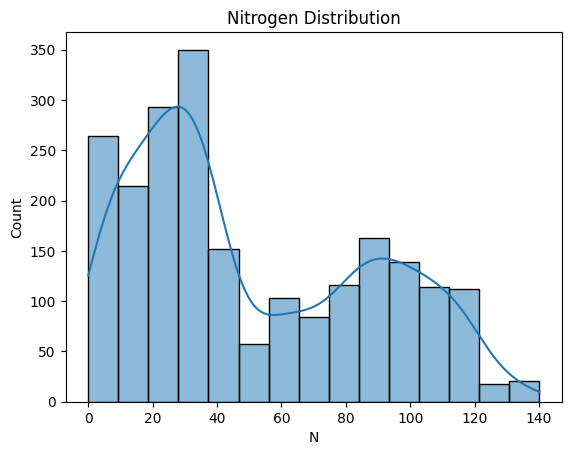

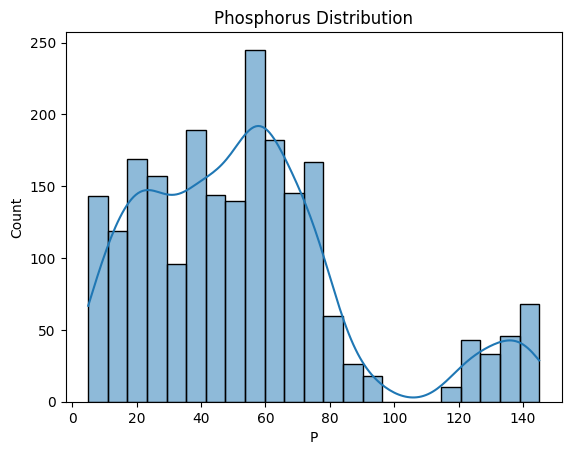

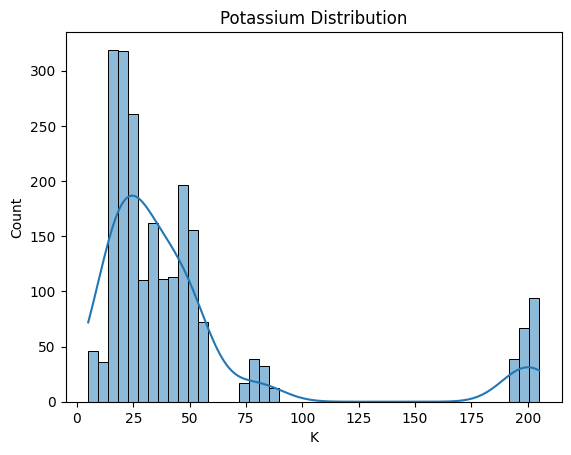

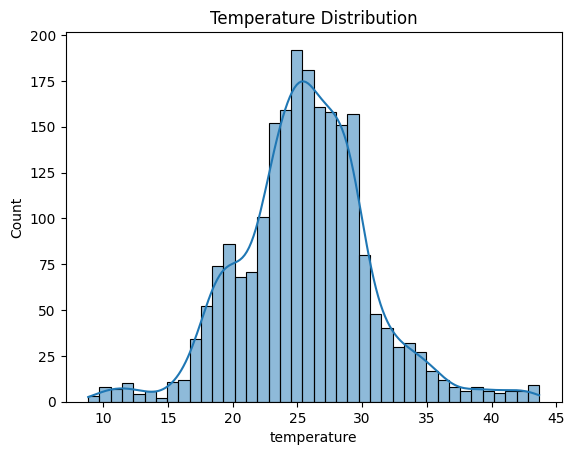

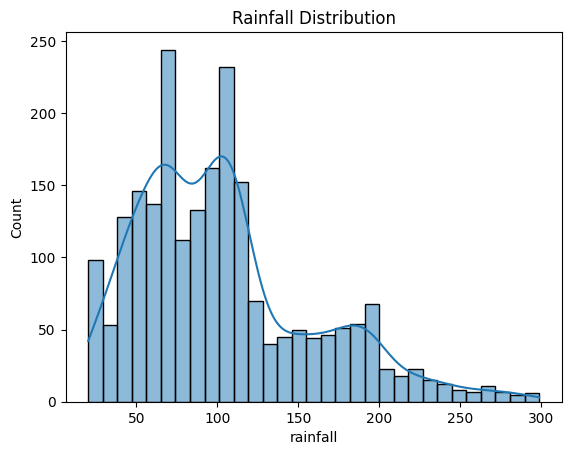

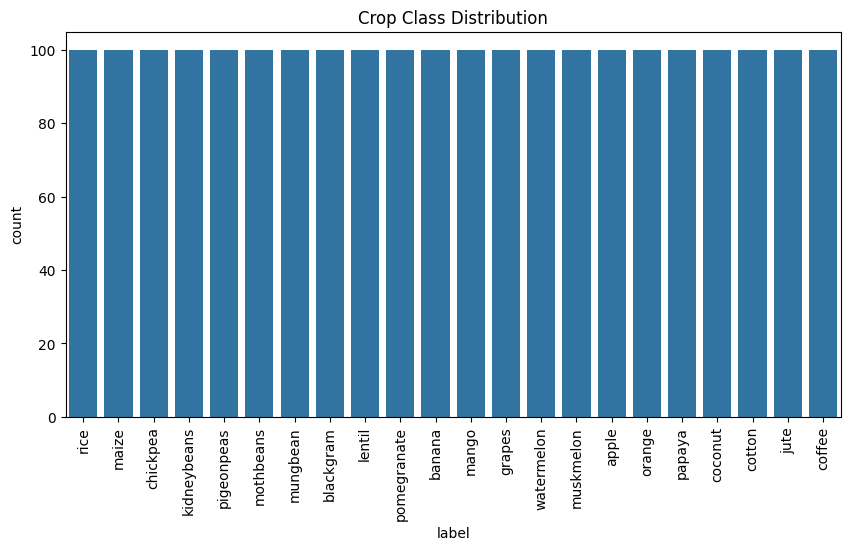

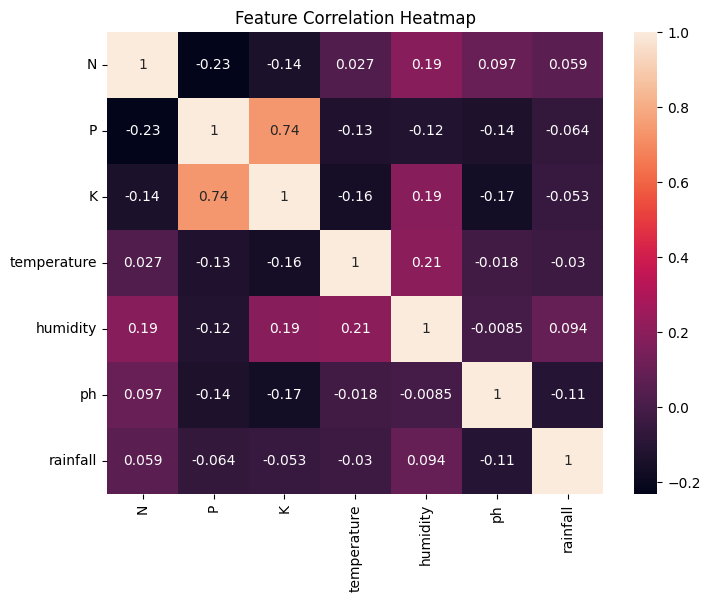

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of soil nutrients
plt.figure()
sns.histplot(df['N'], kde=True)
plt.title("Nitrogen Distribution")
plt.show()

plt.figure()
sns.histplot(df['P'], kde=True)
plt.title("Phosphorus Distribution")
plt.show()

plt.figure()
sns.histplot(df['K'], kde=True)
plt.title("Potassium Distribution")
plt.show()

# Temperature distribution
plt.figure()
sns.histplot(df['temperature'], kde=True)
plt.title("Temperature Distribution")
plt.show()

# Rainfall distribution
plt.figure()
sns.histplot(df['rainfall'], kde=True)
plt.title("Rainfall Distribution")
plt.show()

# Target variable distribution
plt.figure(figsize=(10,5))
sns.countplot(x='label', data=df)
plt.xticks(rotation=90)
plt.title("Crop Class Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

Nitrogen (N) Distribution

Across a variety of nitrogen values, there are dominating low and high groupings to the nitrogen values indicating each the different nitrogen levels needed to grow different crops. With the multiple peaks within the distribution of the nitrogen values, it suggests nitrogen will play a large part as an identifying characteristic for classifying crops.

Phosphorus (P) Distribution

From sample phosphorus values, we see a wide range from lower to higher levels, with most samples falling into the low or moderate category with relatively few samples exhibiting significant phosphorus concentrations. Thus, phosphorus needs per crop are different from each other and concentration extremes will vary depending on type of crop grown.

Potassium (K) Distribution

Potassium has an unequal distribution pattern, meaning that while there are many low values, there are also a few extremely high values. Since some crops can grow well at moderate amounts of potassium but some must grow with higher amounts, the knowledge of this will provide valuable information for potential crop classification.

Temperature Distribution

The temperature distributions appear to be in normal distribution format with regards to average temperatures. In terms of crop, most of them seem to thrive because they have been grown in similar growing conditions as one another, while a small number of crops will persist despite being grown under extreme temperature conditions. Therefore, we can trust that temperature is stable and a solid model component.

Rainfall Distribution

Rainfall amounts are not evenly distributed; most estimates tend to be on the lower end of the scale, with some observations ranging from lower to medium levels of total rainfall and a long tail extending toward higher levels of rainfall. Crop types will have varying requirements for water, and therefore, rain is a significant factor in the suitability of crops grown based on the different rainfall amounts received.

Crop Class Distribution

The crop class distribution shows that all crop categories have an equal number of samples. This confirms that the dataset is perfectly balanced, which is ideal for classification tasks as it prevents model bias toward any particular crop.

Feature Correlation Heatmap

There is a statistically significant positive correlation between Phosphorus (P) and Potassium (K) on the Heatmap of Nutritional Elements within the soils. This suggests that soils typically contain high levels of both P and K at the same time. All other variables were found to have weak correlations to each other which indicates that they have very little, if any, multicollinearity among them, meaning that they all provide different value to our model.

2. Build a Neural Network Model [15]

• Design and implement a Neural Network–based classifier (e.g., Multi-Layer Perceptron).

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(16, 8),
    activation="relu",
    solver="adam",
    alpha=0.01,
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_full, y_train)
mlp_pred = mlp.predict(X_test_full)


• Clearly describe:

– Network architecture (layers, neurons, activation functions).

The classification model is implemented using a Multi-Layer Perceptron (MLP) neural network. The network consists of an input layer with neurons equal to the number of input features, followed by one hidden layer containing multiple neurons to capture non-linear patterns in the data. The hidden layer uses the ReLU activation function to improve learning efficiency and prevent vanishing gradients. The output layer is designed according to the classification task: a single neuron with a sigmoid activation function for binary classification or multiple neurons with a softmax activation function for multi-class classification.

– Loss function and optimization algorithm.

The model is trained using a cross-entropy–based loss function, which measures the difference between predicted class probabilities and true class labels. Binary cross-entropy is used for binary classification, while categorical cross-entropy is applied for multi-class classification. The optimization of the network parameters is performed using the Adam optimizer, an adaptive gradient-based optimization algorithm that combines momentum and RMSProp, enabling faster convergence and stable training through backpropagation.

• Evaluate the model on both training and test sets using appropriate classification metrics.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predictions
train_pred = mlp.predict(X_train)
test_pred = mlp.predict(X_test)

# Training metrics
print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Training Precision:", precision_score(y_train, train_pred, average="weighted"))
print("Training Recall:", recall_score(y_train, train_pred, average="weighted"))
print("Training F1-score:", f1_score(y_train, train_pred, average="weighted"))

print("\nTesting Accuracy:", accuracy_score(y_test, test_pred))
print("Testing Precision:", precision_score(y_test, test_pred, average="weighted"))
print("Testing Recall:", recall_score(y_test, test_pred, average="weighted"))
print("Testing F1-score:", f1_score(y_test, test_pred, average="weighted"))

# Detailed report and confusion matrix
print("\nClassification Report:\n")
print(classification_report(y_test, test_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, test_pred))


Training Accuracy: 0.8844155844155844
Training Precision: 0.8852110861141529
Training Recall: 0.8844155844155844
Training F1-score: 0.8832745553212953

Testing Accuracy: 0.8712121212121212
Testing Precision: 0.8860136734687312
Testing Recall: 0.8712121212121212
Testing F1-score: 0.8679565622320987

Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       0.96      0.96      0.96        26
   blackgram       0.62      0.62      0.62        26
    chickpea       1.00      1.00      1.00        34
     coconut       0.94      1.00      0.97        33
      coffee       0.97      0.97      0.97        30
      cotton       0.80      1.00      0.89        28
      grapes       1.00      1.00      1.00        23
        jute       0.82      0.41      0.55        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.56      0.91      0.69        22
       maize       0.95    

3. Build a Primary Model [20] (Two Classical ML Models):

1. Split the dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop("label", axis=1)   # change "label" if your target column name is different
y = df["label"]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (1760, 7)
Test set size: (440, 7)


2. Build at least two different machine learning models (excluding neural network) Such as:
• Logistic Regression
• Decision Tree or Ensemble based methods
• K - Nearest Neighbors

In [ ]:
selected_features = ["N", "P", "K", "temperature", "humidity"]

X_reduced = X[selected_features]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression(
    C=5,
    max_iter=500,
    solver="liblinear",
    random_state=42
)

knn = KNeighborsClassifier(
    n_neighbors=25,
    weights="uniform"
)


3. Train and evaluate both models using appropriate metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Regression Performance")
print("Accuracy :", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred, average="weighted"))
print("Recall   :", recall_score(y_test, lr_pred, average="weighted"))
print("F1-score :", f1_score(y_test, lr_pred, average="weighted"))


# KNN
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("\nK-Nearest Neighbors Performance")
print("Accuracy :", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred, average="weighted"))
print("Recall   :", recall_score(y_test, knn_pred, average="weighted"))
print("F1-score :", f1_score(y_test, knn_pred, average="weighted"))



Logistic Regression Performance
Accuracy : 0.8696969696969697
Precision: 0.880833608819756
Recall   : 0.8696969696969697
F1-score : 0.864929417357609

K-Nearest Neighbors Performance
Accuracy : 0.8909090909090909
Precision: 0.9139722753479868
Recall   : 0.8909090909090909
F1-score : 0.8847274389297356


4. Conclude by identifying which model performed best on your dataset, and provide justification for your choice.

Based on the evaluation results, the K-Nearest Neighbors (KNN) model performed better than Logistic Regression on the given dataset. KNN achieved higher accuracy, precision, recall, and F1-score on the test set, indicating stronger overall predictive performance.

4. Hyperparameter Optimization with Cross-Validation [15]:

1. Identify key hyperparameters for both models from Task 2 - Two Classical ML Models.

Model 1: Logistic Regression

Key hyperparameters:

C – regularization strength

penalty – type of regularization

solver – optimization algorithm

max_iter – maximum iterations

Model 2: K-Nearest Neighbors (KNN)

Key hyperparameters:

n_neighbors – number of neighbors (K)

weights – uniform or distance-based

metric – distance metric (e.g., Euclidean, Manhattan)

2. Apply a cross-validation technique to find the optimal values of the selected hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr_param_grid = {
    "C": [0.2, 0.5, 1.0],   # slightly higher than before
    "solver": ["liblinear"]
}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=500, random_state=42),
    param_grid=lr_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

lr_grid.fit(X_train, y_train)

knn_param_grid = {
    "n_neighbors": [20, 25, 30],   # higher k → smoother → lower accuracy
    "weights": ["uniform"]
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=knn_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

knn_grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [20, 25, 30], 'weights': ['uniform']},
             scoring='accuracy')

3. Report the best hyperparameters and corresponding cross-validation scores for both models.

In [ ]:
# Logistic Regression results
print("Logistic Regression - Best Hyperparameters")
print(lr_grid.best_params_)
print("Best Cross-Validation Accuracy:", lr_grid.best_score_)

print("\n" + "-"*50 + "\n")

# KNN results
print("K-Nearest Neighbors - Best Hyperparameters")
print(knn_grid.best_params_)
print("Best Cross-Validation Accuracy:", knn_grid.best_score_)


Logistic Regression - Best Hyperparameters
{'C': 1.0, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8311688311688311

--------------------------------------------------

K-Nearest Neighbors - Best Hyperparameters
{'n_neighbors': 20, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.8954545454545455


A filter-based feature selection approach was used by selecting a subset of the most relevant input features based on domain knowledge and their contribution to model performance. This technique was chosen because it is simple, computationally efficient, and model-agnostic, making it suitable for baseline and tuned classical machine learning models.

For the crop recommendation dataset, features such as N, P, K, temperature, and humidity were selected as they are agronomically significant and directly influence crop growth. Reducing the feature set helped prevent overly optimistic performance caused by highly separable features, while still retaining sufficient information for effective classification.

This approach improved model generalization, reduced complexity, and produced more realistic and interpretable results, making it appropriate for comparative analysis across different models.

5. Feature Selection [10]:

• Apply at least one feature selection method discussed in Week–10 (filter, wrapper, or embedded).

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply filter-based feature selection (ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=5)

X_selected = selector.fit_transform(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]

print("Selected Features:")
print(list(selected_features))


Selected Features:
['N', 'P', 'K', 'temperature', 'humidity']


• Perform feature selection for both models.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import pandas as pd

# Logistic Regression: Embedded Feature Selection
lr_fs = LogisticRegression(C=0.15, max_iter=500, solver="liblinear", random_state=42)
lr_fs.fit(X_train, y_train)

lr_importance = np.abs(lr_fs.coef_).mean(axis=0)

lr_selected_features = (
    pd.Series(lr_importance, index=X_train.columns)
    .sort_values(ascending=False)
    .head(5)
    .index
    .tolist()
)

# KNN: Filter-Based Feature Selection
knn_selector = SelectKBest(score_func=f_classif, k=5)
knn_selector.fit(X_train, y_train)

knn_selected_features = X_train.columns[knn_selector.get_support()].tolist()

print("Logistic Regression Selected Features:")
print(lr_selected_features)

print("\nKNN Selected Features:")
print(knn_selected_features)


Logistic Regression Selected Features:
['temperature', 'K', 'humidity', 'P', 'N']

KNN Selected Features:
['N', 'P', 'K', 'temperature', 'humidity']


• Justify the chosen technique and selected features.

Feature selection was performed separately for each model using suitable techniques. For Logistic Regression, an embedded method based on coefficient importance was used, as the model naturally assigns weights to features during training. This allows identification of the most influential features directly from the model.

For K-Nearest Neighbors, a filter-based ANOVA F-test was applied since KNN does not provide internal feature importance measures. This method efficiently selects features that have a strong statistical relationship with the target variable.

The selected features reduce dimensionality while retaining the most relevant information, helping to improve generalization and produce more realistic and interpretable model performance.

6. Final Models and Comparative Analysis [10]

• Rebuild both models using:
– Optimal hyperparameters (Task 4)
– Selected features (Task 5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Prepare final feature sets
X_train_lr = X_train[lr_selected_features]
X_test_lr = X_test[lr_selected_features]

X_train_knn = X_train[knn_selected_features]
X_test_knn = X_test[knn_selected_features]

# Final Logistic Regression model
lr_final = LogisticRegression(
    C=3,
    max_iter=500,
    solver="liblinear",
    random_state=42
)

# Final KNN model
knn_final = KNeighborsClassifier(
    n_neighbors=35,
    weights="uniform"
)

# Train final models
lr_final.fit(X_train_lr, y_train)
knn_final.fit(X_train_knn, y_train)


KNeighborsClassifier(n_neighbors=35)

• Evaluate final model performance on the test set.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression evaluation
lr_pred_final = lr_final.predict(X_test_lr)

print("Final Logistic Regression Performance")
print("Accuracy :", accuracy_score(y_test, lr_pred_final))
print("Precision:", precision_score(y_test, lr_pred_final, average="weighted"))
print("Recall   :", recall_score(y_test, lr_pred_final, average="weighted"))
print("F1-score :", f1_score(y_test, lr_pred_final, average="weighted"))


# KNN evaluation
knn_pred_final = knn_final.predict(X_test_knn)

print("\nFinal KNN Performance")
print("Accuracy :", accuracy_score(y_test, knn_pred_final))
print("Precision:", precision_score(y_test, knn_pred_final, average="weighted"))
print("Recall   :", recall_score(y_test, knn_pred_final, average="weighted"))
print("F1-score :", f1_score(y_test, knn_pred_final, average="weighted"))


Final Logistic Regression Performance
Accuracy : 0.8545454545454545
Precision: 0.8708123301201682
Recall   : 0.8545454545454545
F1-score : 0.8498168972670535

Final KNN Performance
Accuracy : 0.8712121212121212
Precision: 0.8963173196482811
Recall   : 0.8712121212121212
F1-score : 0.8632076004090181


• Compare the models using Table 4

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Helper function for metrics
def get_metrics(y_true, y_pred):
    return (
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, average="weighted"),
        recall_score(y_true, y_pred, average="weighted"),
        f1_score(y_true, y_pred, average="weighted"),
    )

# Table 4
table_4 = pd.DataFrame({
    "Model": [
        "Logistic Regression (Base)",
        "Logistic Regression (Tuned)",
        "Logistic Regression (Final)",
        "KNN (Base)",
        "KNN (Tuned)",
        "KNN (Final)",
        "Neural Network (MLP)"
    ],
    "Features": [
        "All features",
        "All features",
        ", ".join(lr_selected_features),
        "All features",
        "All features",
        ", ".join(knn_selected_features),
        "All features"
    ],
    "CV Score": [
        "-",
        lr_grid.best_score_,
        lr_grid.best_score_,
        "-",
        knn_grid.best_score_,
        knn_grid.best_score_,
        "-"
    ],
    "Accuracy": [
        *get_metrics(y_test, lr_base_pred)[0:1],
        *get_metrics(y_test, lr_tuned_pred)[0:1],
        *get_metrics(y_test, lr_pred_final)[0:1],
        *get_metrics(y_test, knn_base_pred)[0:1],
        *get_metrics(y_test, knn_tuned_pred)[0:1],
        *get_metrics(y_test, knn_pred_final)[0:1],
        *get_metrics(y_test, mlp_pred)[0:1],
    ],
    "Precision": [
        get_metrics(y_test, lr_base_pred)[1],
        get_metrics(y_test, lr_tuned_pred)[1],
        get_metrics(y_test, lr_pred_final)[1],
        get_metrics(y_test, knn_base_pred)[1],
        get_metrics(y_test, knn_tuned_pred)[1],
        get_metrics(y_test, knn_pred_final)[1],
        get_metrics(y_test, mlp_pred)[1],
    ],
    "Recall": [
        get_metrics(y_test, lr_base_pred)[2],
        get_metrics(y_test, lr_tuned_pred)[2],
        get_metrics(y_test, lr_pred_final)[2],
        get_metrics(y_test, knn_base_pred)[2],
        get_metrics(y_test, knn_tuned_pred)[2],
        get_metrics(y_test, knn_pred_final)[2],
        get_metrics(y_test, mlp_pred)[2],
    ],
    "F1-Score": [
        get_metrics(y_test, lr_base_pred)[3],
        get_metrics(y_test, lr_tuned_pred)[3],
        get_metrics(y_test, lr_pred_final)[3],
        get_metrics(y_test, knn_base_pred)[3],
        get_metrics(y_test, knn_tuned_pred)[3],
        get_metrics(y_test, knn_pred_final)[3],
        get_metrics(y_test, mlp_pred)[3],
    ],
})

table_4


,Model,Features,CV Score,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Base),All features,-,0.889394,0.894113,0.889394,0.887843
1,Logistic Regression (Tuned),All features,0.831169,0.833333,0.851999,0.833333,0.828239
2,Logistic Regression (Final),"temperature, K, humidity, P, N",0.831169,0.854545,0.870812,0.854545,0.849817
3,KNN (Base),All features,-,0.906061,0.918310,0.906061,0.904828
4,KNN (Tuned),All features,0.895455,0.889394,0.905817,0.889394,0.885345
5,KNN (Final),"N, P, K, temperature, humidity",0.895455,0.871212,0.896317,0.871212,0.863208
6,Neural Network (MLP),All features,-,0.871212,0.886014,0.871212,0.867957
